<a href="https://colab.research.google.com/github/anegonm/Practica_Modulo_2/blob/main/Actividad_version_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    classification_report, accuracy_score, roc_auc_score, confusion_matrix, RocCurveDisplay, roc_curve
)
import joblib

In [4]:
df = pd.read_csv('heart_disease.csv')

In [5]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB
None


In [7]:
#me muestra los valores null
print(df.isnull().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [8]:
#Esto me dice las columnas con valores binarios
binary_cols = [col for col in df.columns if df[col].dropna().isin([0,1]).all()]
binary_cols

['male',
 'currentSmoker',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [9]:
#Esto me dice las columnas con valores numericos
numeric_cols = [col for col in df.columns if col not in binary_cols]
numeric_cols


['age',
 'education',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [10]:
# Imputador para continuas → media
imp_mean = SimpleImputer(strategy='mean')

# Imputador para binarias → valor más frecuente (0 o 1)
imp_mode = SimpleImputer(strategy='most_frequent')

df_imputed = df.copy()

df_imputed[binary_cols] = imp_mode.fit_transform(df[binary_cols])
df_imputed[numeric_cols] = imp_mean.fit_transform(df[numeric_cols])

In [11]:
#Me muestra los valores nulos
print(df_imputed.isnull().sum())

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [12]:
df_imputed

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000,0.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000,0.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000,1.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.000000,1.0
4234,1.0,51.0,3.0,1.0,43.0,0.0,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.000000,0.0
4235,0.0,48.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.000000,0.0
4236,0.0,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,81.966753,0.0


                     male       age  education  currentSmoker  cigsPerDay  \
male             1.000000 -0.028979   0.017126       0.197596    0.316807   
age             -0.028979  1.000000  -0.163613      -0.213748   -0.192366   
education        0.017126 -0.163613   1.000000       0.018301    0.007962   
currentSmoker    0.197596 -0.213748   0.018301       1.000000    0.766970   
cigsPerDay       0.316807 -0.192366   0.007962       0.766970    1.000000   
BPMeds          -0.051545  0.120955  -0.010363      -0.048358   -0.045663   
prevalentStroke -0.004546  0.057655  -0.035110      -0.032988   -0.032706   
prevalentHyp     0.005313  0.307194  -0.080993      -0.103260   -0.065947   
diabetes         0.015708  0.101258  -0.038146      -0.044295   -0.037063   
totChol         -0.069974  0.260270  -0.022507      -0.046285   -0.026025   
sysBP           -0.035989  0.394302  -0.128260      -0.130230   -0.088505   
diaBP            0.057933  0.206104  -0.061755      -0.107746   -0.056391   

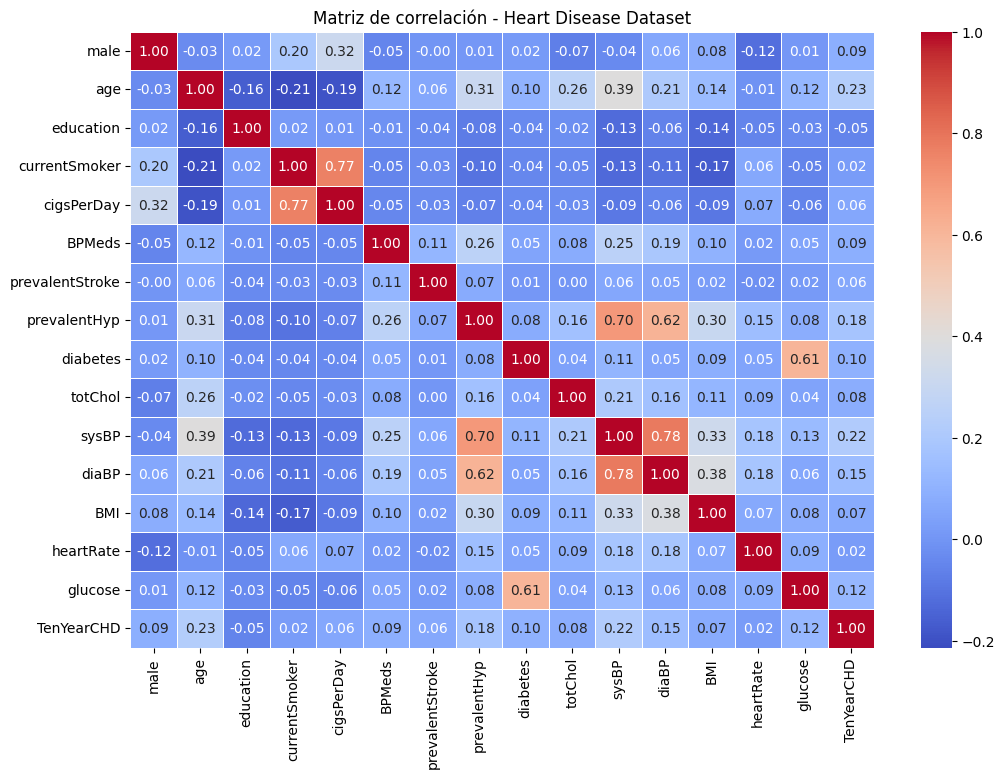

In [13]:
# Calcular la matriz de correlación
corr_matrix = df_imputed.corr()

# Mostrar la matriz en consola
print(corr_matrix)

# Visualizar con un mapa de calor
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación - Heart Disease Dataset")
plt.show()

In [14]:
def framingham_risk_score(row):
    points = 0

    # Edad (simplificado, ejemplo masculino)
    if 30 <= row["age"] <= 34: points += 0
    elif 35 <= row["age"] <= 39: points += 2
    elif 40 <= row["age"] <= 44: points += 5
    elif 45 <= row["age"] <= 49: points += 6
    elif 50 <= row["age"] <= 54: points += 8
    elif 55 <= row["age"] <= 59: points += 10
    elif 60 <= row["age"] <= 64: points += 11
    elif 65 <= row["age"] <= 69: points += 12
    elif 70 <= row["age"] <= 74: points += 14
    elif 75 <= row["age"] <= 79: points += 15

    # Colesterol total (ejemplo simplificado)
    if row["totChol"] < 160: points += 0
    elif 160 <= row["totChol"] < 200: points += 1
    elif 200 <= row["totChol"] < 240: points += 2
    elif 240 <= row["totChol"] < 280: points += 3
    else: points += 4

    # Presión sistólica
    if row["sysBP"] < 120: points += 0
    elif 120 <= row["sysBP"] < 130: points += 1
    elif 130 <= row["sysBP"] < 140: points += 2
    elif 140 <= row["sysBP"] < 160: points += 3
    else: points += 4

    # Fumador
    if row["currentSmoker"] == 1: points += 2

    # Diabetes
    if row["diabetes"] == 1: points += 2

    # Hipertension
    if row["prevalentHyp"] == 1: points += 1

    return points

df_imputed["FRS_points"] = df_imputed.apply(framingham_risk_score, axis=1)


In [15]:
df_imputed

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,FRS_points
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000,0.0,3
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000,0.0,10
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000,0.0,12
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000,1.0,19
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000,0.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.000000,1.0,19
4234,1.0,51.0,3.0,1.0,43.0,0.0,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.000000,0.0,13
4235,0.0,48.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.000000,0.0,13
4236,0.0,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,81.966753,0.0,10


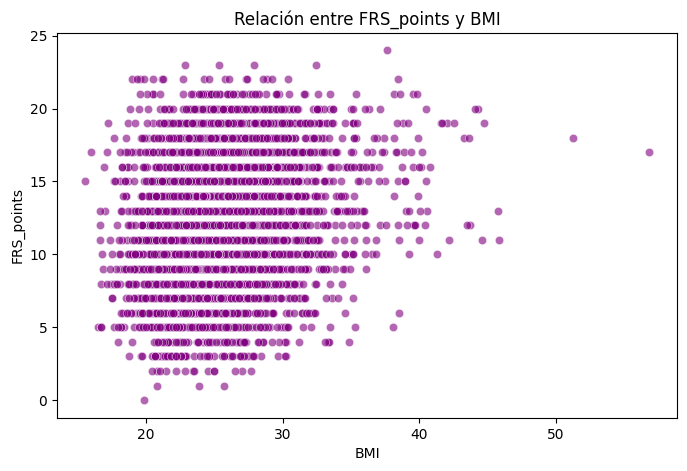

In [16]:
# Scatterplot: relación entre FRS_points y BMI
plt.figure(figsize=(8,5))
sns.scatterplot(x="BMI", y="FRS_points", data=df_imputed, alpha=0.6, color="purple")
plt.title("Relación entre FRS_points y BMI")
plt.xlabel("BMI")
plt.ylabel("FRS_points")
plt.show()

/tmp/ipython-input-1841555517.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="BMI_category", y="FRS_points", data=df_imputed, palette="Set2")


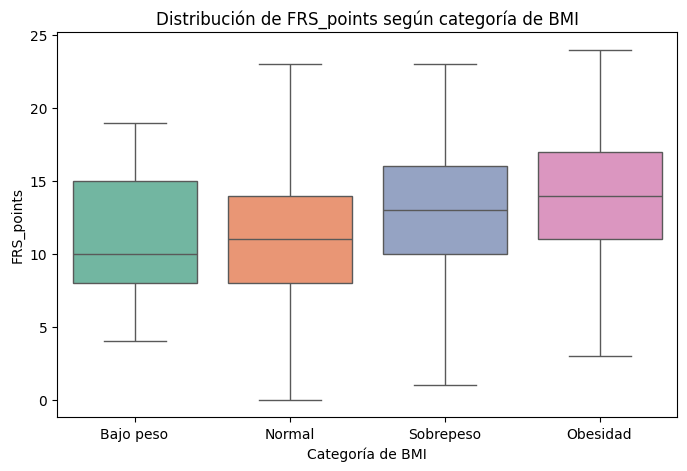

In [17]:
# Boxplot: distribución de FRS_points por categorías de BMI
# Puedes crear categorías de BMI (ejemplo: normal, sobrepeso, obesidad)
df_imputed["BMI_category"] = pd.cut(df_imputed["BMI"],
                                    bins=[0, 18.5, 25, 30, 100],
                                    labels=["Bajo peso", "Normal", "Sobrepeso", "Obesidad"])

plt.figure(figsize=(8,5))
sns.boxplot(x="BMI_category", y="FRS_points", data=df_imputed, palette="Set2")
plt.title("Distribución de FRS_points según categoría de BMI")
plt.xlabel("Categoría de BMI")
plt.ylabel("FRS_points")
plt.show()

In [18]:
df_imputed

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,FRS_points,BMI_category
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000,0.0,3,Sobrepeso
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000,0.0,10,Sobrepeso
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000,0.0,12,Sobrepeso
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000,1.0,19,Sobrepeso
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000,0.0,14,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.000000,1.0,19,Sobrepeso
4234,1.0,51.0,3.0,1.0,43.0,0.0,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.000000,0.0,13,Normal
4235,0.0,48.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.000000,0.0,13,Normal
4236,0.0,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,81.966753,0.0,10,Normal


In [19]:
df_imputed = df_imputed.drop(columns=['BMI_category'])

In [20]:
df_imputed

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,FRS_points
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000,0.0,3
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000,0.0,10
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000,0.0,12
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000,1.0,19
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000,0.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.000000,1.0,19
4234,1.0,51.0,3.0,1.0,43.0,0.0,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.000000,0.0,13
4235,0.0,48.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.000000,0.0,13
4236,0.0,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,81.966753,0.0,10


In [21]:
cat_cols = df_imputed.select_dtypes(include='category').columns
df_clean = pd.get_dummies(df_imputed, columns=cat_cols, drop_first=True)


In [22]:
TARGET = 'TenYearCHD'
X = df_clean.drop(columns=[TARGET])
y = df_clean[TARGET]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
X_train.info()
X_train.select_dtypes(include='object').columns

<class 'pandas.core.frame.DataFrame'>
Index: 3390 entries, 1767 to 2273
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3390 non-null   float64
 1   age              3390 non-null   float64
 2   education        3390 non-null   float64
 3   currentSmoker    3390 non-null   float64
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   float64
 7   prevalentHyp     3390 non-null   float64
 8   diabetes         3390 non-null   float64
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  FRS_points       3390 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 450.2 KB


Index([], dtype='object')

Antes de SMOTE: [2875  515]
Después de SMOTE: [2875 2875]

      LogisticRegression
Optimal threshold: 0.36
AUC: 0.6942351025864949
              precision    recall  f1-score   support

         0.0       0.95      0.48      0.64       719
         1.0       0.23      0.85      0.36       129

    accuracy                           0.54       848
   macro avg       0.59      0.67      0.50       848
weighted avg       0.84      0.54      0.60       848

Confusion matrix:
 [[346 373]
 [ 19 110]]


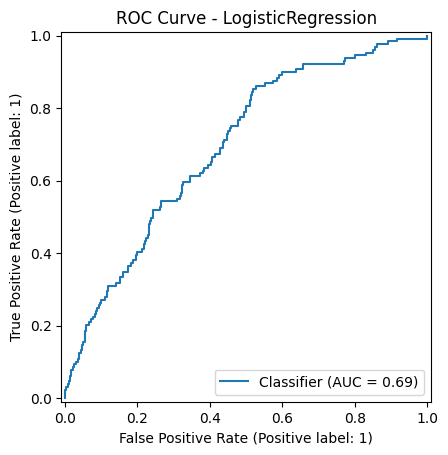


      RandomForest
Optimal threshold: 0.24
AUC: 0.6539498226434216
              precision    recall  f1-score   support

         0.0       0.91      0.57      0.70       719
         1.0       0.22      0.67      0.33       129

    accuracy                           0.59       848
   macro avg       0.56      0.62      0.52       848
weighted avg       0.80      0.59      0.64       848

Confusion matrix:
 [[410 309]
 [ 42  87]]


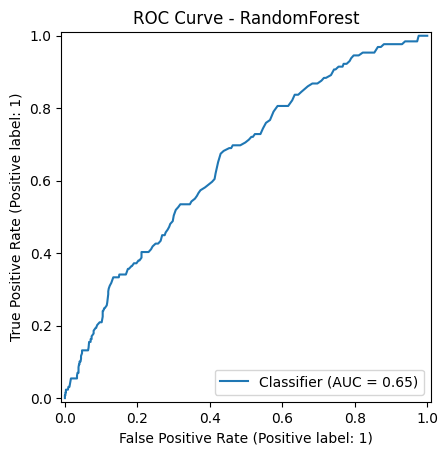


COMPARACIÓN DE MODELOS (clase 1)
LogisticRegression: Recall=0.85, Precision=0.23, F1=0.36, AUC=0.69
RandomForest: Recall=0.67, Precision=0.22, F1=0.33, AUC=0.65

Mejor modelo para detectar positivos: LogisticRegression (F1=0.36)


In [25]:
# ============================
# 3. ESCALADO
# ============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ============================
# 4. SMOTE (oversampling clase 1)
# ============================
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)
print(f"Antes de SMOTE: {np.bincount(y_train)}")
print(f"Después de SMOTE: {np.bincount(y_train_res)}")

# ============================
# 5. MODELOS
# ============================
models = {
    'LogisticRegression': LogisticRegression(
        max_iter=5000,
        class_weight='balanced',
        solver='lbfgs'
    ),
    'RandomForest': RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        class_weight='balanced'
    )
}

# ============================
# 6. ENTRENAMIENTO + AJUSTE THRESHOLD + MÉTRICAS
# ============================
results = {}

for name, model in models.items():
    print("\n============================")
    print(f"      {name}")
    print("============================")

    # LR usa datos escalados + SMOTE
    if name == 'LogisticRegression':
        model.fit(X_train_res, y_train_res)
        probs = model.predict_proba(X_test_scaled)[:,1]
    else:
        # RF usa SMOTE pero no necesita escalado estrictamente
        model.fit(X_train_res, y_train_res)
        probs = model.predict_proba(X_test_scaled)[:,1]

    # Encontrar threshold óptimo
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]
    print(f"Optimal threshold: {best_thresh:.2f}")

    # Predicciones
    preds = (probs >= best_thresh).astype(int)

    # Métricas
    auc = roc_auc_score(y_test, probs)
    print("AUC:", auc)
    print(classification_report(y_test, preds))
    print("Confusion matrix:\n", confusion_matrix(y_test, preds))

    report_dict = classification_report(y_test, preds, output_dict=True)
    recall_1 = report_dict['1.0']['recall']
    precision_1 = report_dict['1.0']['precision']
    f1_1 = report_dict['1.0']['f1-score']

    results[name] = {
        'auc': auc,
        'recall_1': recall_1,
        'precision_1': precision_1,
        'f1_1': f1_1
    }

    # Curva ROC
    RocCurveDisplay.from_predictions(y_test, probs)
    plt.title(f"ROC Curve - {name}")
    plt.show()

# ============================
# 7. COMPARACIÓN DE MODELOS
# ============================
print("\n============================")
print("COMPARACIÓN DE MODELOS (clase 1)")
print("============================")
for name, metrics in results.items():
    print(f"{name}: Recall={metrics['recall_1']:.2f}, Precision={metrics['precision_1']:.2f}, F1={metrics['f1_1']:.2f}, AUC={metrics['auc']:.2f}")

# Mejor modelo según F1 clase 1
best_model = max(results.items(), key=lambda x: x[1]['f1_1'])
print(f"\nMejor modelo para detectar positivos: {best_model[0]} (F1={best_model[1]['f1_1']:.2f})")



In [26]:
best_model = models['LogisticRegression']  # por ejemplo
joblib.dump(best_model, 'framingham_rf_clean.joblib')
print("Modelo guardado.")

Modelo guardado.


Informe de resultados – Comparación de modelos para predicción de CHD a 10 años
1. Objetivo del proyecto

El objetivo de este análisis es desarrollar y comparar modelos de clasificación binaria para predecir la probabilidad de enfermedad cardiovascular a 10 años (TenYearCHD) utilizando datos clínicos. Se presta especial atención a la detección de la clase positiva (pacientes con CHD), dado el interés clínico de identificar posibles casos de riesgo.

2. Preparación de los datos

**Carga y limpieza de datos**

Se eliminó la columna BMI_category porque no aportaba información adicional frente al valor continuo BMI.

Se verificaron valores faltantes y se realizaron transformaciones necesarias para garantizar la consistencia de las variables.

**Distribución original de clases**

Clase 0 (no CHD): 2875
Clase 1 (CHD):     515

El dataset estaba muy desbalanceado, con solo el 15% de casos positivos.

Este desbalance puede afectar negativamente el entrenamiento de modelos de clasificación, ya que el modelo podría sesgarse hacia la clase mayoritaria.

**Aplicación de SMOTE**
Después de SMOTE: [2875 2875]
Se utilizó SMOTE para generar muestras sintéticas de la clase minoritaria.

Resultado: dataset balanceado con 2875 ejemplos en cada clase, permitiendo que los modelos aprendan mejor las características de los casos positivos.

3. Modelos entrenados

Se entrenaron dos modelos:

**Logistic Regression (Regresión Logística)**

Modelo lineal que predice la probabilidad de pertenencia a la clase positiva.

Se ajustó el umbral de decisión a 0.36 para mejorar la captura de positivos.

Métrica AUC: 0.694

**Random Forest (Bosque Aleatorio)**

Modelo de ensamble basado en árboles de decisión, no lineal, capaz de capturar interacciones complejas entre variables.

Umbral de decisión ajustado a 0.24 para mejorar recall de clase positiva.

Métrica AUC: 0.654

4. Resultados de cada modelo
4.1 Logistic Regression

Matriz de confusión:
[[346 373]
 [ 19 110]]

Verdaderos negativos (TN): 346

Falsos positivos (FP): 373

Falsos negativos (FN): 19

Verdaderos positivos (TP): 110

Métricas:

Métrica	Clase 1
Recall	0.85
Precision	0.23
F1-score	0.36
AUC	0.694

Interpretación:

Recupera la mayoría de los casos positivos (recall 0.85), es decir, detecta correctamente al 85% de pacientes con riesgo de CHD.

La precision es baja (0.23) → muchos falsos positivos.

F1-score moderado (0.36) refleja el compromiso entre recall y precision.

AUC 0.694 indica un rendimiento moderado.

4.2 Random Forest

Matriz de confusión:
[[410 309]
 [ 42  87]]
TN: 410

FP: 309

FN: 42

TP: 87

Métricas:

Métrica	Clase 1
Recall	0.67
Precision	0.22
F1-score	0.33
AUC	0.654

Interpretación:

Recupera menos casos positivos que la regresión logística (recall 0.67).

Precision similar a la regresión logística (0.22).

F1-score ligeramente inferior (0.33).

AUC más bajo (0.654), indicando peor capacidad de discriminación entre clases.

5. Comparación de modelos (clase 1)

Modelo	Recall	Precision	F1-score	AUC
Logistic Regression	0.85	0.23	0.36	0.694
Random Forest	0.67	0.22	0.33	0.654

Conclusión de la comparación:

Mejor modelo para detectar positivos: Logistic Regression, por su mayor recall y F1-score ligeramente superior.

Random Forest captura menos positivos y tiene un AUC menor, aunque reduce un poco los falsos positivos comparado con la regresión logística.

Esto refleja un trade-off clásico entre recall y precision en datasets desbalanceados.

6. Conclusiones generales

SMOTE fue útil para balancear clases y permitir que ambos modelos aprendieran mejor la clase minoritaria.

Logistic Regression es más eficaz para la detección de casos positivos, lo cual es crítico en un contexto clínico donde no queremos dejar pasar pacientes con riesgo de CHD.

Random Forest es menos efectivo en recall, pero podría mejorarse afinando hiperparámetros o combinándolo con técnicas de balanceo adicionales.

La elección final del modelo depende del objetivo clínico:

Si se prioriza captura de positivos, usar Logistic Regression.

Si se prioriza reducir falsos positivos, podría explorarse Random Forest o ajustar thresholds.